In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/beth-dataset/labelled_training_data.csv
/kaggle/input/beth-dataset/labelled_2021may-ip-10-100-1-4-dns.csv
/kaggle/input/beth-dataset/labelled_2021may-ip-10-100-1-186-dns.csv
/kaggle/input/beth-dataset/labelled_validation_data.csv
/kaggle/input/beth-dataset/labelled_2021may-ip-10-100-1-26-dns.csv
/kaggle/input/beth-dataset/labelled_2021may-ip-10-100-1-186.csv
/kaggle/input/beth-dataset/labelled_2021may-ip-10-100-1-4.csv
/kaggle/input/beth-dataset/labelled_2021may-ip-10-100-1-26.csv
/kaggle/input/beth-dataset/labelled_2021may-ip-10-100-1-105-dns.csv
/kaggle/input/beth-dataset/labelled_2021may-ip-10-100-1-95-dns.csv
/kaggle/input/beth-dataset/labelled_testing_data.csv
/kaggle/input/beth-dataset/labelled_2021may-ip-10-100-1-105.csv
/kaggle/input/beth-dataset/labelled_2021may-ip-10-100-1-95.csv
/kaggle/input/beth-dataset/labelled_2021may-ubuntu-dns.csv
/kaggle/input/beth-dataset/labelled_2021may-ubuntu.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/beth-dataset/labelled_training_data.csv')
test_df = pd.read_csv('/kaggle/input/beth-dataset/labelled_testing_data.csv')

In [3]:
train_df.dtypes


timestamp          float64
processId            int64
threadId             int64
parentProcessId      int64
userId               int64
mountNamespace       int64
processName         object
hostName            object
eventId              int64
eventName           object
stackAddresses      object
argsNum              int64
returnValue          int64
args                object
sus                  int64
evil                 int64
dtype: object

In [4]:
train_df.head()


,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,1809.495787,381,7337,1,100,4026532231,close,ip-10-100-1-120,157,prctl,"[140662171848350, 11649800180280676]",5,0,"[{'name': 'option', 'type': 'int', 'value': 'P...",1,0
1,1809.495832,381,7337,1,100,4026532231,close,ip-10-100-1-120,3,close,[140662171777451],1,0,"[{'name': 'fd', 'type': 'int', 'value': 19}]",1,0
2,1809.495921,381,7337,1,100,4026532231,close,ip-10-100-1-120,1010,sched_process_exit,[],0,0,[],1,0
3,1894.139651,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,21,access,[],2,-2,"[{'name': 'pathname', 'type': 'const char*', '...",1,0
4,1894.142127,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,1005,security_file_open,"[139778263990104, 139778263906698]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",1,0


In [5]:
train_df.describe(include=['object', 'float', 'int'])


,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
count,763144.000000,763144.000000,763144.000000,763144.000000,763144.000000,7.631440e+05,763144,763144,763144.000000,763144,763144,763144.000000,763144.000000,763144,763144.000000,763144.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,36,8,NaN,32,97050,NaN,NaN,214720,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,ps,ubuntu,NaN,close,[],NaN,NaN,"[{'name': 'fd', 'type': 'int', 'value': 9}]",NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,406313,190500,NaN,218080,521115,NaN,NaN,107321,NaN,NaN
mean,1844.582673,6814.763308,6820.265241,1882.216609,2.279034,4.026532e+09,NaN,NaN,288.158953,NaN,NaN,2.672082,17.520924,NaN,0.001663,0.0
std,1136.638249,1948.871187,1937.068333,2215.563094,37.416576,1.649030e+02,NaN,NaN,385.117778,NaN,NaN,1.340906,318.596662,NaN,0.040744,0.0
min,132.560721,1.000000,1.000000,0.000000,0.000000,4.026532e+09,NaN,NaN,3.000000,NaN,NaN,0.000000,-115.000000,NaN,0.000000,0.0
25%,903.250802,7313.000000,7313.000000,187.000000,0.000000,4.026532e+09,NaN,NaN,3.000000,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.0
50%,1829.203642,7365.000000,7365.000000,1385.000000,0.000000,4.026532e+09,NaN,NaN,62.000000,NaN,NaN,3.000000,0.000000,NaN,0.000000,0.0
75%,2761.380825,7415.000000,7415.000000,1648.000000,0.000000,4.026532e+09,NaN,NaN,257.000000,NaN,NaN,4.000000,4.000000,NaN,0.000000,0.0


<Axes: >

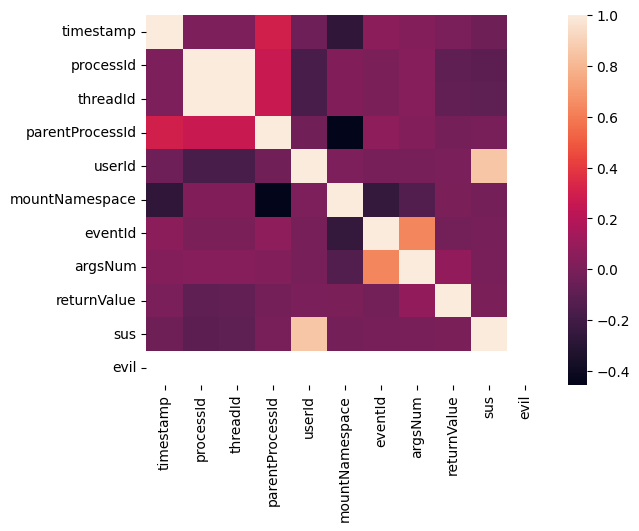

In [6]:
sns.heatmap(train_df.corr(numeric_only= True))

<Axes: >

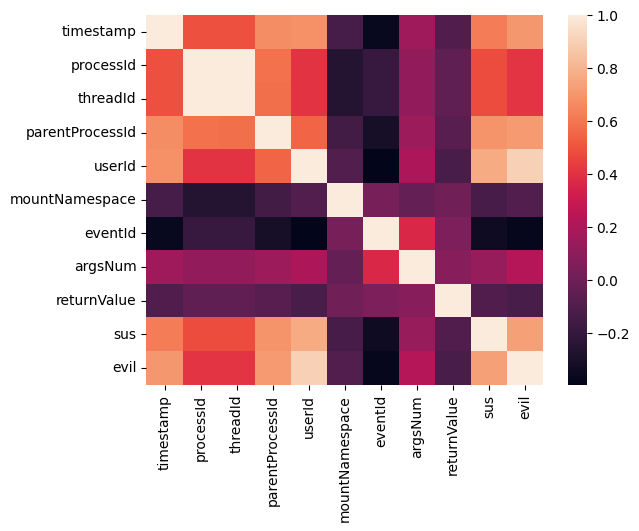

In [7]:
sns.heatmap(test_df.corr(numeric_only = True))

In [8]:
train_df.loc[:, ['eventId', 'eventName']].head(10)

,eventId,eventName
0,157,prctl
1,3,close
2,1010,sched_process_exit
3,21,access
4,1005,security_file_open
5,257,openat
6,5,fstat
7,3,close
8,1005,security_file_open
9,257,openat


In [9]:
train_df.loc[:, ['processName', 'hostName', 'args']].head(10)

,processName,hostName,args
0,close,ip-10-100-1-120,"[{'name': 'option', 'type': 'int', 'value': 'P..."
1,close,ip-10-100-1-120,"[{'name': 'fd', 'type': 'int', 'value': 19}]"
2,close,ip-10-100-1-120,[]
3,sh,ip-10-100-1-120,"[{'name': 'pathname', 'type': 'const char*', '..."
4,sh,ip-10-100-1-120,"[{'name': 'pathname', 'type': 'const char*', '..."
5,sh,ip-10-100-1-120,"[{'name': 'dirfd', 'type': 'int', 'value': -10..."
6,sh,ip-10-100-1-120,"[{'name': 'fd', 'type': 'int', 'value': 3}, {'..."
7,sh,ip-10-100-1-120,"[{'name': 'fd', 'type': 'int', 'value': 3}]"
8,sh,ip-10-100-1-120,"[{'name': 'pathname', 'type': 'const char*', '..."
9,sh,ip-10-100-1-120,"[{'name': 'dirfd', 'type': 'int', 'value': -10..."


In [10]:
train_df['sus'].value_counts()

sus
0    761875
1      1269
Name: count, dtype: int64

<Axes: >

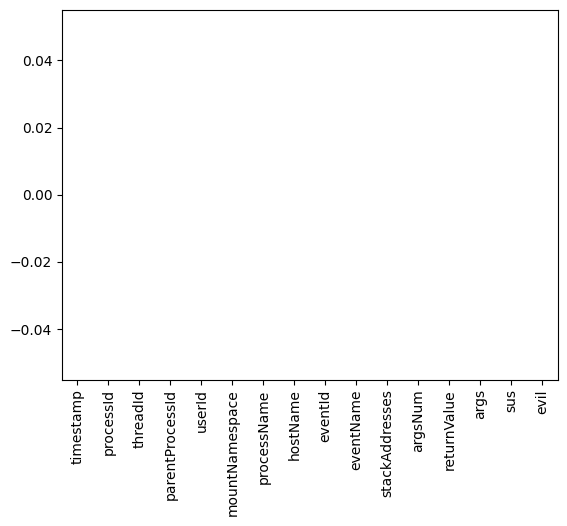

In [11]:
train_df.isnull().sum().plot(kind='bar')


In [12]:
train_df.duplicated().value_counts()

print( ( train_df.duplicated().value_counts()/len(train_df) ) * 100)

False    100.0
Name: count, dtype: float64


In [13]:
train_df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

train_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763144 entries, 0 to 763143
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timestamp        763144 non-null  float64
 1   processId        763144 non-null  int64  
 2   threadId         763144 non-null  int64  
 3   parentProcessId  763144 non-null  int64  
 4   userId           763144 non-null  int64  
 5   mountNamespace   763144 non-null  int64  
 6   processName      763144 non-null  object 
 7   hostName         763144 non-null  object 
 8   eventId          763144 non-null  int64  
 9   eventName        763144 non-null  object 
 10  stackAddresses   763144 non-null  object 
 11  argsNum          763144 non-null  int64  
 12  returnValue      763144 non-null  int64  
 13  args             763144 non-null  object 
 14  sus              763144 non-null  int64  
 15  evil             763144 non-null  int64  
dtypes: float64(1), int64(10), object(5)
me

timestamp          762911
processId             545
threadId              588
parentProcessId       205
userId                  7
mountNamespace          6
processName            36
hostName                8
eventId                32
eventName              32
stackAddresses      97050
argsNum                 6
returnValue           524
args               214720
sus                     2
evil                    1
dtype: int64

In [14]:
numeric_columns = train_df.select_dtypes(include=['float64','int64']).columns
numeric_columns

Index(['timestamp', 'processId', 'threadId', 'parentProcessId', 'userId',
       'mountNamespace', 'eventId', 'argsNum', 'returnValue', 'sus', 'evil'],
      dtype='object')

In [15]:
categorical_columns = train_df.select_dtypes(include=['object']).columns
categorical_columns 

Index(['processName', 'hostName', 'eventName', 'stackAddresses', 'args'], dtype='object')

In [16]:
train_df = reduce_mem_usage(train_df)

NameError: name 'reduce_mem_usage' is not defined

In [ ]:
X = train_df.drop(["sus","evil"], axis=1)
X = X[["processId", "parentProcessId", "userId", "mountNamespace", "eventId", "argsNum", "returnValue"]]

y =  train_df["sus"]

In [ ]:
X.head()

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
ss = StandardScaler()
X = ss.fit_transform(X)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
target_class = y.unique()

In [ ]:
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, y_train)

In [ ]:
y_pred = DTC_Classifier.predict( X_test )

print( classification_report( y_test , y_pred ) )

matrix = confusion_matrix( y_test , y_pred )
sns.heatmap( matrix )
plt.show()

sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
plt.title( "Class Wise Recall Score (Decision Tree)")
plt.show()

sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
plt.title( "Class Wise Precision Score (Decision Tree)")
plt.show()


In [ ]:
clf = SVC()
clf.fit( X_train , y_train )

In [ ]:
y_pred = clf.predict( X_test )

print( classification_report( y_test , y_pred ) )

matrix = confusion_matrix( y_test , y_pred )
sns.heatmap( matrix )
plt.show()

sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
plt.title( "Class Wise Recall Score (SVM)")
plt.show()

sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
plt.title( "Class Wise Precision Score (SVM)")
plt.show()
